# 04. Self Oil Station Price Analysis

## 1. 셀레니움 설치
- 윈도우, mac(intel)
    - conda install selenium
- mac(m1)
    - pip install selenium
- chromedriver

In [15]:
!pip install selenium

  Using cached selenium-3.141.0-py2.py3-none-any.whl (904 kB)


In [14]:
!pip uninstall -y selenium

Found existing installation: selenium 3.141.0
Uninstalling selenium-3.141.0:
  Successfully uninstalled selenium-3.141.0


In [40]:
from selenium import webdriver

In [55]:
driver = webdriver.Chrome('C:/Users/고선욱/Documents/ds_study/driver/chromedriver.exe') # Windows: '../driver/chromedriver.exe'
# driver.get('https://www.naver.com')

In [69]:
driver.quit()

## 2. 셀프 주유소가 정말 저렴한가요? - 데이터 확보하기 위한 작업
- https://www.opinet.co.kr/searRgSelect.do
- 사이트 구조 확인
- 목표 데이터
    - 브랜드
    - 가격
    - 셀프 주유 여부
    - 위치

## 3. 셀레니움으로 접근

In [58]:
from selenium import webdriver

In [76]:
# 페이지 접근
url = 'https://www.opinet.co.kr/searRgSelect.do'
driver = webdriver.Chrome('C:/Users/고선욱/Documents/ds_study/driver/chromedriver.exe')
driver.get(url)

In [77]:
driver.get(url)

- 문제
    - 1. 해당 URL로 한 번에 접근이 안된다
    - 2. 메인페이지로 접속이 되고, 팝업창이 하나 나온다

In [61]:
# 팝업창 화면 전환 후 닫아주기
driver.switch_to_window(driver.window_handles[-1])

C:\Users\고선욱\AppData\Local\Temp/ipykernel_83452/2194531635.py:2: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])


In [62]:
# 접근 페이지 다시 요청

In [63]:
driver.close()

In [64]:
driver.switch_to_window(driver.window_handles[-1])

C:\Users\고선욱\AppData\Local\Temp/ipykernel_83452/3023539272.py:1: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])


In [65]:
driver.get(url)

In [72]:
import time

def main_get():
    # 페이지 접근
    url = 'https://www.opinet.co.kr/searRgSelect.do'
    driver = webdriver.Chrome('C:/Users/고선욱/Documents/ds_study/driver/chromedriver.exe')
    driver.get(url)
    time.sleep(3)
    # 팝업창으로 전환
    driver.switch_to_window(driver.window_handles[-1])
    # 팝업창 닫아주기
    driver.close()
    time.sleep(3)
    # 메인화면 창으로 전환
    driver.switch_to_window(driver.window_handles[-1])
    # 접근 URL 다시 요청
    driver.get(url)

In [67]:
# driver.close()

In [75]:
main_get()

C:\Users\고선욱\AppData\Local\Temp/ipykernel_83452/3091821245.py:10: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])
C:\Users\고선욱\AppData\Local\Temp/ipykernel_83452/3091821245.py:15: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])


In [80]:
# 지역: 시/도

sido_list_raw = driver.find_element_by_id("SIDO_NM0")
sido_list_raw.text

'            시/도\n            \n             \n              서울\n             \n             \n            \n             \n             \n              부산\n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n             \n              광주\n             \n            \n             \n             \n              대전\n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n             \n              경기\n             \n            \n             \n             \n              강원\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              

In [84]:
sido_list = sido_list_raw.find_elements_by_tag_name('option')
len(sido_list), sido_list[17].text

(18, '제주')

In [85]:
sido_list[1].get_attribute('value')

'서울특별시'

In [86]:
# 1.

sido_names = []

for option in sido_list:
    sido_names.append(option.get_attribute('value'))
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [88]:
# 2.

sido_names = [option.get_attribute('value') for option in sido_list]
sido_names[:5]

['', '서울특별시', '부산광역시', '대구광역시', '인천광역시']

In [89]:
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [91]:
sido_list_raw.send_keys(sido_names[0])

In [97]:
# 구

gu_list_raw = driver.find_element_by_id('SIGUNGU_NM0') # 부모 태그
gu_list = gu_list_raw.find_elements_by_tag_name('option') # 자식 태그

gu_names = [option.get_attribute('value') for option in gu_list]
gu_names = gu_names[1:]
gu_names[:5], len(gu_names)

(['강남구', '강동구', '강북구', '강서구', '관악구'], 25)

In [98]:
gu_list_raw.send_keys(gu_names[15])

In [99]:
# 엑셀 저장

driver.find_element_by_css_selector('#glopopd_excel').click()

In [101]:
driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()

In [103]:
element_get_excel = driver.find_element_by_id('glopopd_excel')
element_get_excel.click()

In [105]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(3)
    
    element_get_excel = driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()
    time.sleep(3)

C:\Users\고선욱\AppData\Local\Temp/ipykernel_83452/1575308058.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
driver.close()

## 4. 데이터 정리하기

In [122]:
import pandas as pd
from glob import glob

In [123]:
# !pip install glob

In [124]:
# 파일 목록 한 번에 가져오기
glob('C:/Users/고선욱/Documents/ds_study/data/지역_*.xls')

['C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (1).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (10).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (11).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (12).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (13).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (14).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (15).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (16).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (17).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (18).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (19).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (2).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (20).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (21).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (22).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (23).

In [125]:
# 파일명 저장
stations_files = glob('C:/Users/고선욱/Documents/ds_study/data/지역_*.xls')
stations_files[:5]

['C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (1).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (10).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (11).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (12).xls',
 'C:/Users/고선욱/Documents/ds_study/data\\지역_위치별(주유소) (13).xls']

In [126]:
# 하나만 읽어보기
tmp = pd.read_excel(stations_files[0], header=2)
tmp.tail(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
14,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,1868,1668,-
15,서울특별시,강동주유소,서울 강동구 양재대로 1509 (길동),SK에너지,02-477-5101,N,2448,2178,1957,-


In [127]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

In [128]:
tmp_raw

[       지역                    상호                            주소      상표  \
 0   서울특별시  재건에너지 재정제2주유소 고속셀프지점  서울특별시 강동구  천호대로 1246 (둔촌제2동)  현대오일뱅크   
 1   서울특별시                구천면주유소         서울 강동구 구천면로 357 (암사동)  현대오일뱅크   
 2   서울특별시        지에스칼텍스㈜ 동서울주유소        서울 강동구 천호대로 1456 (상일동)   GS칼텍스   
 3   서울특별시     현대오일뱅크㈜직영 명일셀프주유소          서울 강동구 고덕로 168 (명일동)  현대오일뱅크   
 4   서울특별시               방아다리주유소          서울 강동구 동남로 811 (명일동)   SK에너지   
 5   서울특별시       대성석유(주)직영 길동주유소              서울 강동구 천호대로 1168   GS칼텍스   
 6   서울특별시              sk해뜨는주유소         서울 강동구  상일로 132 (강일동)   SK에너지   
 7   서울특별시         지에스칼텍스㈜ 신월주유소        서울 강동구 양재대로 1323 (성내동)   GS칼텍스   
 8   서울특별시      주)지유에너지직영 오렌지주유소          서울 강동구 성안로 102 (성내동)   SK에너지   
 9   서울특별시        (주)삼표에너지 고덕주유소           서울 강동구 고덕로 39 (암사동)   GS칼텍스   
 10  서울특별시     현대오일뱅크㈜직영 암사셀프주유소         서울 강동구 올림픽로 749 (암사동)  현대오일뱅크   
 11  서울특별시       (주)퍼스트오일 코알라주유소     서울특별시 강동구  올림픽로 556 (성내동)   S-OIL   
 12  서울특별시               천호현대주유소      

- 형식이 동일하고 연달아 붙이기만 하면 될 때는 concat

In [129]:
stations_raw = pd.concat(tmp_raw)
stations_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1648,1448,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1693,1487,-
2,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1712,1512,-
3,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,1939,1719,1519,-
4,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1720,1520,-
...,...,...,...,...,...,...,...,...,...,...
33,서울특별시,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),GS칼텍스,02-518-5141,N,2358,2158,1904,1359
34,서울특별시,뉴서울(강남),서울 강남구 언주로 716,SK에너지,02-518-5631,N,2495,2275,1995,-
35,서울특별시,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),GS칼텍스,02-3411-3271,N,-,-,-,-
36,서울특별시,삼성주유소,서울 강남구 삼성로 521 (삼성동),SK에너지,02-538-0809,N,-,-,-,-


In [130]:
stations_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 37
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      478 non-null    object
 1   상호      478 non-null    object
 2   주소      478 non-null    object
 3   상표      478 non-null    object
 4   전화번호    478 non-null    object
 5   셀프여부    478 non-null    object
 6   고급휘발유   478 non-null    object
 7   휘발유     478 non-null    object
 8   경유      478 non-null    object
 9   실내등유    478 non-null    object
dtypes: object(10)
memory usage: 41.1+ KB


In [131]:
stations_raw.columns

Index(['지역', '상호', '주소', '상표', '전화번호', '셀프여부', '고급휘발유', '휘발유', '경유', '실내등유'], dtype='object')

In [132]:
stations = pd.DataFrame({
    '상호': stations_raw['상호'],
    '주소': stations_raw['주소'],
    '가격': stations_raw['휘발유'],
    '셀프': stations_raw['셀프여부'],
    '상표': stations_raw['상표']
})
stations.tail()

,상호,주소,가격,셀프,상표
33,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2158,N,GS칼텍스
34,뉴서울(강남),서울 강남구 언주로 716,2275,N,SK에너지
35,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),-,N,GS칼텍스
36,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지
37,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지


In [134]:
for eachAddress in stations['주소']:
    print(eachAddress.split()[1])

강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
강북구
강북

In [135]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1648,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1693,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1712,Y,GS칼텍스,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1719,Y,현대오일뱅크,강동구
4,방아다리주유소,서울 강동구 동남로 811 (명일동),1720,Y,SK에너지,강동구
...,...,...,...,...,...,...
33,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2158,N,GS칼텍스,강남구
34,뉴서울(강남),서울 강남구 언주로 716,2275,N,SK에너지,강남구
35,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),-,N,GS칼텍스,강남구
36,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구


In [136]:
stations['구'].unique(),len(stations['구'].unique()) 

(array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
        '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
        '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object),
 25)

In [137]:
# stations[stations['구'] == '서울특별시']
# stations.loc[stations['구'] == '서울특별시', '구'] = '성동구'
# stations[stations['구'] == '특별시']
# stations.loc[stations['구'] == '특별시', '구'] = '도봉구'

In [138]:
# 가격 데이터형 변환 object => float

stations['가격'] = stations['가격'].astype('float')

ValueError: could not convert string to float: '-'

In [139]:
# 가격 정보가 없는 주유소
stations[stations['가격'] == '-']

,상호,주소,가격,셀프,상표,구
31,현대오일뱅크㈜직영 올림픽셀프주유소,서울 송파구 위례성대로 188 (오금동),-,Y,현대오일뱅크,송파구
27,지에스칼텍스㈜ 화일주유소,서울 영등포구 도림로 415,-,Y,GS칼텍스,영등포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
14,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,-,Y,GS칼텍스,중랑구
15,구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
14,양지진흥개발(주)상계주유소,서울 노원구 노해로 527 (상계동),-,N,SK에너지,노원구
17,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),-,Y,현대오일뱅크,도봉구
35,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),-,N,GS칼텍스,강남구
36,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구


In [140]:
# 가격 정보가 있는 주유소만 사용
stations = stations[stations['가격'] != '-']
stations.tail()

,상호,주소,가격,셀프,상표,구
30,경원주유소,서울 강남구 도산대로 428 (청담동),2125,N,S-OIL,강남구
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2155,N,SK에너지,강남구
32,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2158,N,GS칼텍스,강남구
33,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2158,N,GS칼텍스,강남구
34,뉴서울(강남),서울 강남구 언주로 716,2275,N,SK에너지,강남구


In [141]:
stations['가격'] = stations['가격'].astype('float')

C:\Users\고선욱\AppData\Local\Temp/ipykernel_83452/786094376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations['가격'] = stations['가격'].astype('float')


In [142]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 34
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      467 non-null    object 
 1   주소      467 non-null    object 
 2   가격      467 non-null    float64
 3   셀프      467 non-null    object 
 4   상표      467 non-null    object 
 5   구       467 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.5+ KB


In [143]:
stations

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1648.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1693.0,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1712.0,Y,GS칼텍스,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1719.0,Y,현대오일뱅크,강동구
4,방아다리주유소,서울 강동구 동남로 811 (명일동),1720.0,Y,SK에너지,강동구
...,...,...,...,...,...,...
30,경원주유소,서울 강남구 도산대로 428 (청담동),2125.0,N,S-OIL,강남구
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2155.0,N,SK에너지,강남구
32,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2158.0,N,GS칼텍스,강남구
33,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2158.0,N,GS칼텍스,강남구


In [144]:
# 인덱스 재정렬
stations.reset_index(inplace=True)
stations.tail()

,index,상호,주소,가격,셀프,상표,구
462,30,경원주유소,서울 강남구 도산대로 428 (청담동),2125.0,N,S-OIL,강남구
463,31,SK논현주유소,서울 강남구 논현로 747 (논현동),2155.0,N,SK에너지,강남구
464,32,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2158.0,N,GS칼텍스,강남구
465,33,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2158.0,N,GS칼텍스,강남구
466,34,뉴서울(강남),서울 강남구 언주로 716,2275.0,N,SK에너지,강남구


In [145]:
stations.head()

,index,상호,주소,가격,셀프,상표,구
0,0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1648.0,Y,현대오일뱅크,강동구
1,1,구천면주유소,서울 강동구 구천면로 357 (암사동),1693.0,N,현대오일뱅크,강동구
2,2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1712.0,Y,GS칼텍스,강동구
3,3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1719.0,Y,현대오일뱅크,강동구
4,4,방아다리주유소,서울 강동구 동남로 811 (명일동),1720.0,Y,SK에너지,강동구


In [146]:
del stations['index']
stations.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1648.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1693.0,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1712.0,Y,GS칼텍스,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1719.0,Y,현대오일뱅크,강동구
4,방아다리주유소,서울 강동구 동남로 811 (명일동),1720.0,Y,SK에너지,강동구


In [147]:
stations.tail()

,상호,주소,가격,셀프,상표,구
462,경원주유소,서울 강남구 도산대로 428 (청담동),2125.0,N,S-OIL,강남구
463,SK논현주유소,서울 강남구 논현로 747 (논현동),2155.0,N,SK에너지,강남구
464,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2158.0,N,GS칼텍스,강남구
465,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2158.0,N,GS칼텍스,강남구
466,뉴서울(강남),서울 강남구 언주로 716,2275.0,N,SK에너지,강남구


In [148]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      467 non-null    object 
 1   주소      467 non-null    object 
 2   가격      467 non-null    float64
 3   셀프      467 non-null    object 
 4   상표      467 non-null    object 
 5   구       467 non-null    object 
dtypes: float64(1), object(5)
memory usage: 22.0+ KB


## 5. 주유 가격 정보 시각화

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic('matplotlib', 'inline')
# %matplotlib inline

path='C:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font', family='Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')

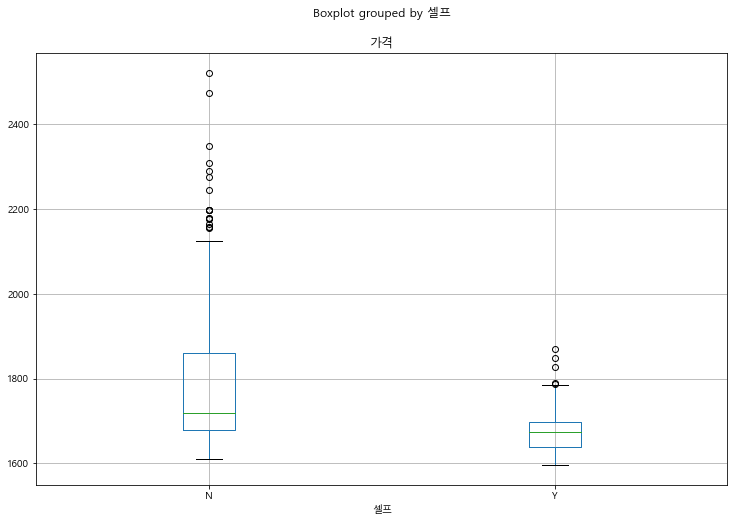

In [153]:
# boxplot(feat. pandas)

stations.boxplot(column='가격', by='셀프', figsize=(12, 8));

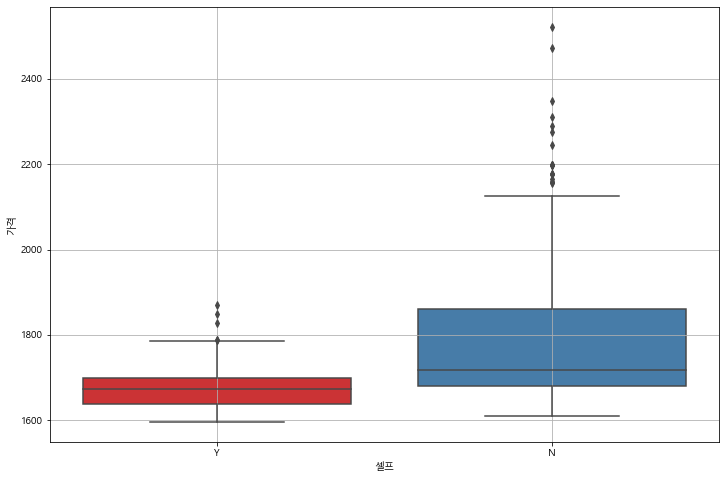

In [157]:
# boxplot(feat. seaborn)

plt.figure(figsize=(12, 8))
sns.boxplot(x='셀프', y='가격', data=stations, palette='Set1')
plt.grid(True)
plt.show()

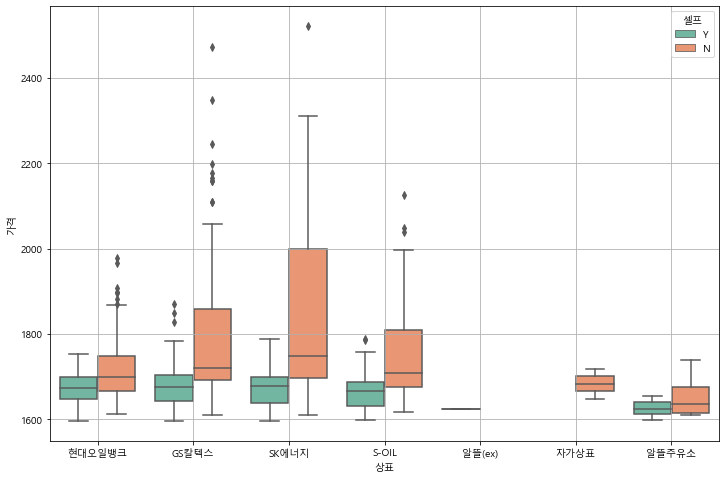

In [158]:
# boxplot(feat. seaborn)

plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set2')
plt.grid(True)
plt.show()

In [159]:
# 지도 시각화

In [160]:
import json
import folium
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [161]:
# 가장 비싼 주유소 10개
stations.sort_values(by='가격', ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
291,서남주유소,서울 중구 통일로 30,2522.0,N,SK에너지,중구
256,서계주유소,서울 용산구 청파로 367 (서계동),2473.0,N,GS칼텍스,용산구
290,필동주유소,서울 중구 퇴계로 196 (필동2가),2349.0,N,GS칼텍스,중구
289,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2310.0,N,SK에너지,중구
255,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2290.0,N,SK에너지,용산구
466,뉴서울(강남),서울 강남구 언주로 716,2275.0,N,SK에너지,강남구
288,약수주유소,서울 중구 다산로 173,2246.0,N,GS칼텍스,중구
254,에너비스,서울 용산구 한남대로 82 (한남동),2198.0,N,SK에너지,용산구
389,구로주유소,서울 구로구 구로동로 137 (구로동),2198.0,N,GS칼텍스,구로구
281,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2198.0,N,SK에너지,종로구


In [162]:
# 가장 값싼 주유소 10개
stations.sort_values(by='가격').head(10)

,상호,주소,가격,셀프,상표,구
16,동서울고속주유소,서울 동대문구 한천로 414,1595.0,Y,SK에너지,동대문구
402,화랑대주유소,서울 노원구 화랑로 483,1595.0,Y,현대오일뱅크,노원구
401,배꽃나라주유소,서울 노원구 화랑로 466 (공릉동),1595.0,Y,GS칼텍스,노원구
205,영등포제일셀프주유소,서울 영등포구 가마산로 379,1598.0,Y,현대오일뱅크,영등포구
207,성락주유소,서울 영등포구 가마산로 414 (신길동),1598.0,Y,S-OIL,영등포구
204,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1598.0,Y,SK에너지,영등포구
206,도림주유소,서울 영등포구 도림로 343 (도림동),1598.0,Y,알뜰주유소,영등포구
179,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1604.0,Y,SK에너지,양천구
231,수유동주유소,서울 강북구 도봉로 395 (수유동),1608.0,Y,GS칼텍스,강북구
415,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1608.0,Y,SK에너지,도봉구


In [163]:
import numpy as np

gu_data = pd.pivot_table(data=stations, index='구', values='가격', aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1874.400000
강동구,1770.625000
강북구,1636.076923
강서구,1687.343750
관악구,1719.866667


In [165]:
geo_path = 'C:/Users/고선욱/Documents/ds_study/data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='Stamen Toner')
my_map.choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, '가격'],
    key_on='feature.id',
    fill_color='PuRd'
)
my_map